In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\melro\\OneDrive\\Documents\\sales.csv")

In [6]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   sale_id branch         city customer_type  gender  product_name  \
0        1      A     New York        Member    Male       Shampoo   
1        2      B  Los Angeles        Normal  Female      Notebook   
2        3      A     New York        Member  Female         Apple   
3        4      A      Chicago        Normal    Male     Detergent   
4        5      B  Los Angeles        Member  Female  Orange Juice   

  product_category  unit_price  quantity   tax  total_price  reward_points  
0    Personal Care        5.50         3  1.16        17.66              1  
1       Stationery        2.75        10  1.93        29.43              0  
2           Fruits        1.20        15  1.26        19.26              1  
3        Household        7.80         5  2.73        41.73              0  
4        Beverages        3.50         7  1.72        26.22              2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column

In [8]:
#Branch Sales
branch_sales = df.groupby('branch')['total_price'].sum().sort_values(ascending=False)
print(branch_sales)


branch
A    82811.64
B    35772.26
Name: total_price, dtype: float64


In [9]:
#City Sales
city_sales = df.groupby('city')['total_price'].sum().sort_values(ascending=False)
print(city_sales)


city
Chicago        42584.71
New York       40226.93
Los Angeles    35772.26
Name: total_price, dtype: float64


Text(0.5, 0, 'City')

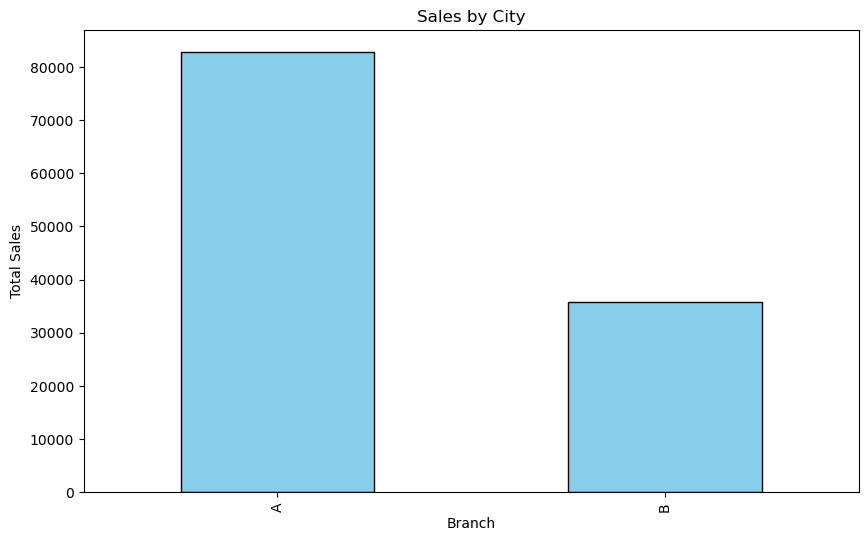

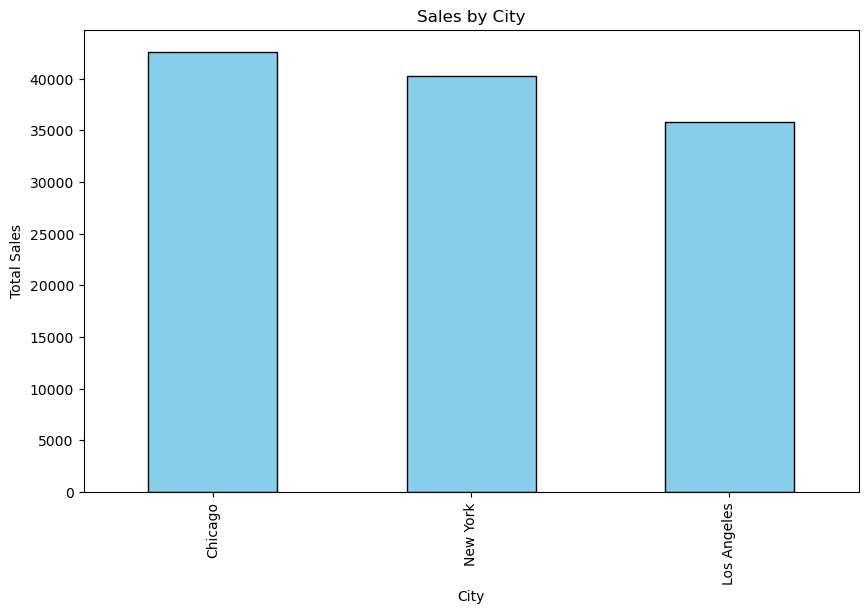

In [15]:
# Plot
plt.figure(figsize=(10, 6)) 
ax = branch_sales.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    title='Sales by City'
)
plt.ylabel("Total Sales")
plt.xlabel("Branch")

plt.figure(figsize=(10, 6))  
ax = city_sales.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    title='Sales by City'
)
plt.ylabel("Total Sales")
plt.xlabel("City")

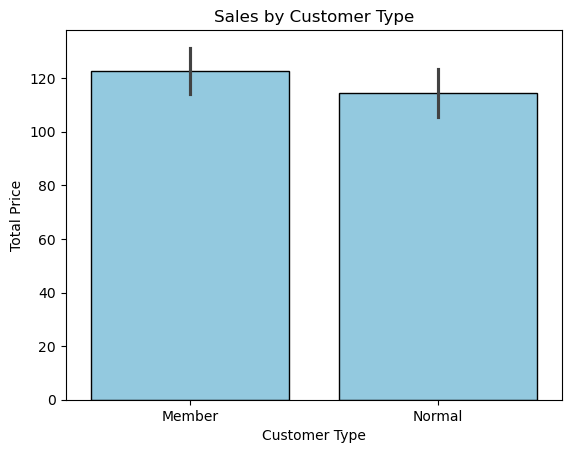

Average reward points for members: 11.74


In [22]:
# Sales comparison
sns.barplot(data=df, x='customer_type', y='total_price',color='skyblue', edgecolor='black')
plt.title("Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Price")
plt.show()


# Reward points average
member_rewards = df[df['customer_type'] == 'Member']['reward_points'].mean()
print(f"Average reward points for members: {member_rewards:.2f}")


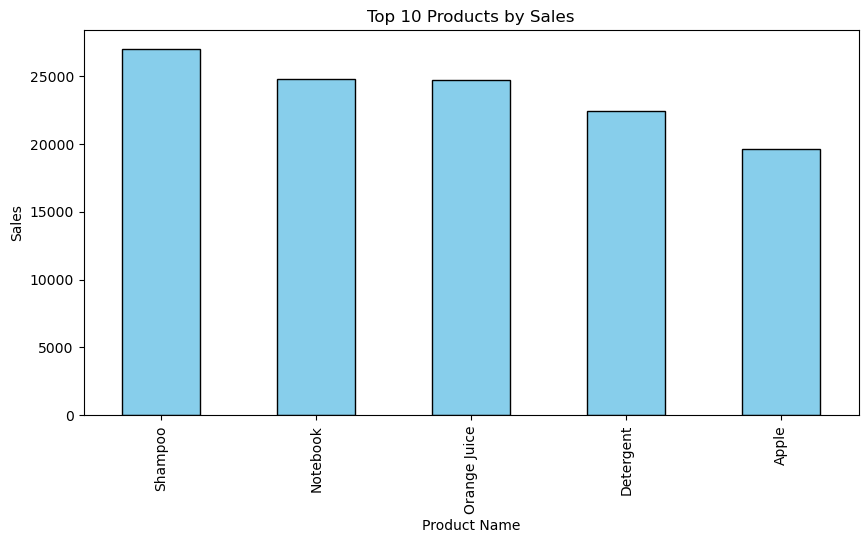

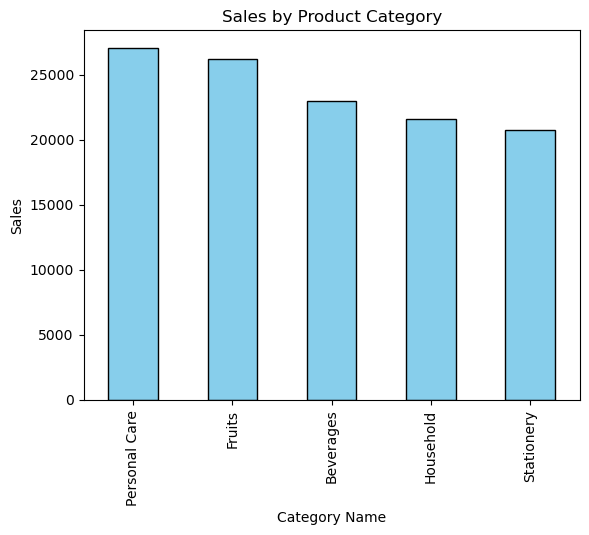

In [26]:
#Top Products
# By Product Name
top_products = df.groupby('product_name')['total_price'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Products by Sales',color='skyblue',edgecolor='black')
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.show()

# By Category
top_categories = df.groupby('product_category')['total_price'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', title='Sales by Product Category',color='skyblue',edgecolor='black')
plt.xlabel("Category Name")
plt.ylabel("Sales")
plt.show()


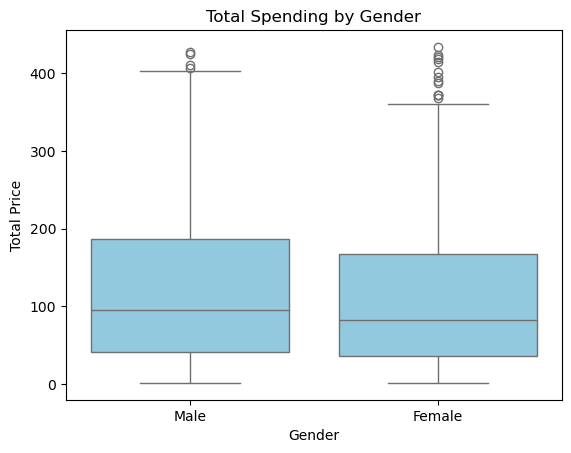

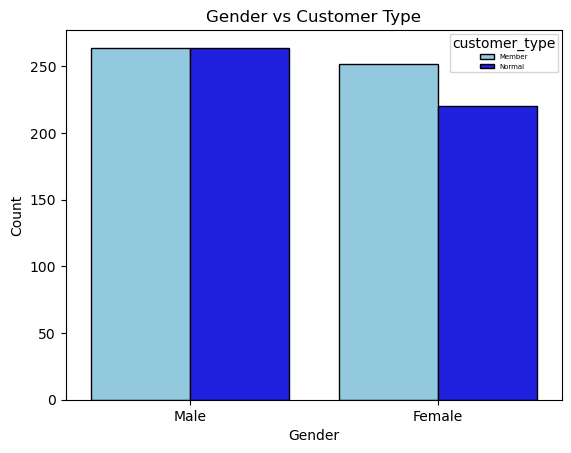

In [35]:
#Spending Habits based on gender
sns.boxplot(data=df, x='gender', y='total_price',color = "skyblue")
plt.title("Total Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Price")
plt.show()

# Gender distribution by customer type
sns.countplot(data=df, x='gender', hue='customer_type',palette={'Member': 'skyblue', 'Normal': 'blue'},edgecolor='black')
plt.title("Gender vs Customer Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='customer_type', prop={'size': 5})
plt.show()


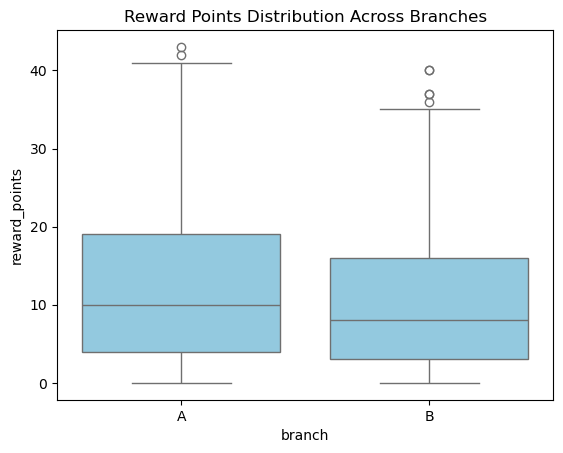

In [37]:
#Branch Wise Rewards Points Distribution
sns.boxplot(data=df[df['customer_type'] == 'Member'], x='branch', y='reward_points',color = "skyblue")
plt.title("Reward Points Distribution Across Branches")
plt.show()
